In [16]:
import re
import jieba
import sys
import matplotlib
from nltk import *
from matplotlib import rcParams
from matplotlib.font_manager import findfont, FontProperties, _rebuild
from universalMethod import *

# 读取文本信息
def readFile(path):
    str_doc = ""
    with open(path, 'r', encoding='utf-8') as f:
        str_doc = f.read()
    return str_doc

# 正则对字符串清洗
def textParse(str_doc):
    # 去掉字符
    str_doc = re.sub('\u3000', '', str_doc)
    # 去除空格
    str_doc = re.sub('\s+', ' ', str_doc)
    # 去除换行符等特殊符号
    str_doc= re.sub('[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", str_doc)
    # 正则过滤掉特殊符号,标点,英文,数字...
    r1 = '[a-zA-Z0-9]+'
    str_doc = re.sub(r1, "", str_doc)
    return str_doc

def get_stop_words(path=r'./停用词.txt'):
    file = open(path, 'r', encoding='utf-8').read().split('\n')
    return set(file)

def rm_tokens(words, stwlist):
    words_list = list(words)
    stop_words = stwlist
    for i in range(words_list.__len__())[::-1]:
        # 去除停用词
        if words_list[i] in stop_words:
            words_list.pop(i)
        # 去除数字
        elif words_list[i].isdigit():
            words_list.pop(i)
        # 去除单个字符
        elif len(words_list[i]) == 1:
            words_list.pop(i)
        # 去除空格
        elif words_list[i] == " ":
            words_list.pop(i)
    return words_list

def seg_doc(str_doc):
    # 1.处理原文本
    sent_list = str_doc.split('\n')
    sent_list = map(textParse, sent_list)
    # 2.获取停用词
    stwlist = get_stop_words()
    # 3.分词并去除停用词
    word_2dlist = [rm_tokens(jieba.cut(part, cut_all=False), stwlist) for part in sent_list]
    # 4. 合并列表
    word_list = sum(word_2dlist, [])
#     print(sent_list)
    return word_list

def nltk_wf_feature(word_list=None):
    # 方法一: 得到的关键词和词频不是一一对应的
    fdist = FreqDist(word_list)
    print(fdist.keys(), "\n", fdist.values(), "\n")
    
    # 查看指定词语词频
    w = "陈奕迅"
    print(w, "Frequency: ", fdist.freq(w))
    print(w, "Num of app: ", fdist[w])
    
    # 频率分布表
    print('='*3, "频率分布表", '='*3)
    fdist.tabulate(10)
    
    print('='*3, "频率分布图", '='*3)
    fdist.plot(30)
    
    return fdist
    
    # 解决中文显示问题
    # 1.查看当前字体
    # 2.更换字体库

def nltk_wf_feature2(word_list=None):
    # 方法二: 
    from collections import Counter
    words = Counter(word_list)
    print(words.keys(), "\n", words.values())
    print("------根据字符长度------")
    wlist = [w for w in words if len(w) > 2]
    print(wlist)
    
def hl_freqWord(fdist):
    wordList = []
    print('='*3, '打印统计的词频', '='*3)
    for key in fdist.keys():
        if fdist.get(key) > 2 and fdist.get(key) < 20:
            wordList.append(key + ":" + str(fdist.get(key)))
    return wordList
    

dict_keys(['一起', '破晓', '天光', '黄昏', '日暮', '中年', '陈奕', '迅玩起', '浪漫', '拿手', '微博', '宣布', '举行', '一场', '线上', '慈善', '音乐会', '时间', '定为', '早上', '傍晚', '恰好', '日出', '日落', '不由得', '想起', '理查德', '克莱特', '执导', '系列', '电影', '黎明', '这是', '香港', '现场', '演出', '制作', '行业协会', '疫情', '期间', '第一场', '半年', '活动', '叫停', '音乐', '没有', '机会', '陈奕迅', '开唱', '部分', '协会', '筹款', '筹集', '港币', '一同', '捐给', '难关', '今早', '身边', '歌迷', '朋友', '早早', '定好', '闹钟', '点钟', '看起', '上半场', '可惜', '期待', '直播', '天气', '不佳', '团队', '改用', '昨天', '同一', '时刻', '演唱', '片段', '冥冥之中', '岁月', '如歌', '预期', '总要', '维多利亚', '港湾', '沉睡', '晨曦', '密云', '香江', '上方', '出现', '响起', '江边', '钢琴', '开麦', '演奏', '班底', '一帮', '老朋友', '十年', '合作', '举办', '演唱会', '红馆', '一连', '两年', '打造', '新专辑', '这帮', '出场', '主打', '知己', '唱歌', '像是', '我常', '对话', '隔离', '时期', '怀念', '亲密', '接触', '一班人', '同偕到', '不靠', '运气', '天使', '礼物', '一首', '的士', '司机', '环卫工', '都市', '小人物', '歌里', '支撑', '城市', '运转', '大人物', '黄金时代', '那句', '黄金', '广场', '分手', '时代', '门外', '再聚', '更是', '耐人寻味', '太阳', '照常', '升起', '相信', '励志', '路线', '首歌', '串起', '出道', '现在', '轨迹', '不同

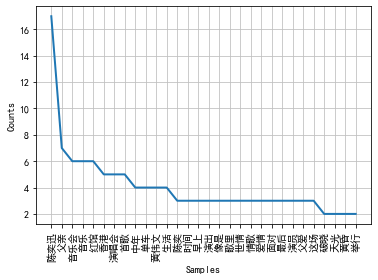

=== 打印统计的词频 ===
['中年:4', '陈奕:3', '音乐会:6', '时间:3', '早上:3', '香港:5', '演出:3', '音乐:6', '陈奕迅:17', '演唱会:5', '红馆:6', '像是:3', '歌里:3', '首歌:5', '世情:3', '情歌:3', '爱情:3', '面对:3', '最后:3', '演员:3', '单车:4', '黄伟文:4', '父亲:7', '父爱:3', '生活:4', '这场:3']


In [18]:
# if __name__ == '__main__':

# 1.read file
path = r'./从日出到日落，陈奕迅唱的不只是爱情 从日出到日落，陈奕迅唱的不只是爱情.txt'
str_doc = readFile(path)
word_list = seg_doc(str_doc)
# print(word_list)
# 2.选择高低词频
fdist = nltk_wf_feature(word_list)
wordList = hl_freqWord(fdist)
print(wordList)

In [12]:
fdist

FreqDist({'陈奕迅': 17, '父亲': 7, '音乐会': 6, '音乐': 6, '红馆': 6, '香港': 5, '演唱会': 5, '首歌': 5, '中年': 4, '单车': 4, ...})